# Robust Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.columns = col_name

In [6]:
pd.options.display.float_format='{:,.2f}'.format

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


# RANdom SAmple Consensus (RANSAC) Algorithm

Each iteration performs the following steps:

1. Select min_samples random samples from the original data and check whether the set of data is valid (see is_data_valid).

2. Fit a model to the random subset (base_estimator.fit) and check whether the estimated model is valid (see is_model_valid).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (base_estimator.predict(X) - y) - all data samples with absolute residuals smaller than the residual_threshold are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [8]:
#reshape diye matrix format e convert koro
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [9]:
from sklearn.linear_model import RANSACRegressor

In [10]:
ransac = RANSACRegressor()

In [11]:
ransac.fit(X, y)

RANSACRegressor()

In [12]:
# Robustly fit linear model with RANSAC algorithm

In [13]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [14]:
# 3 theke 10 porjonto ...but 1 step kore barbe
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [15]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

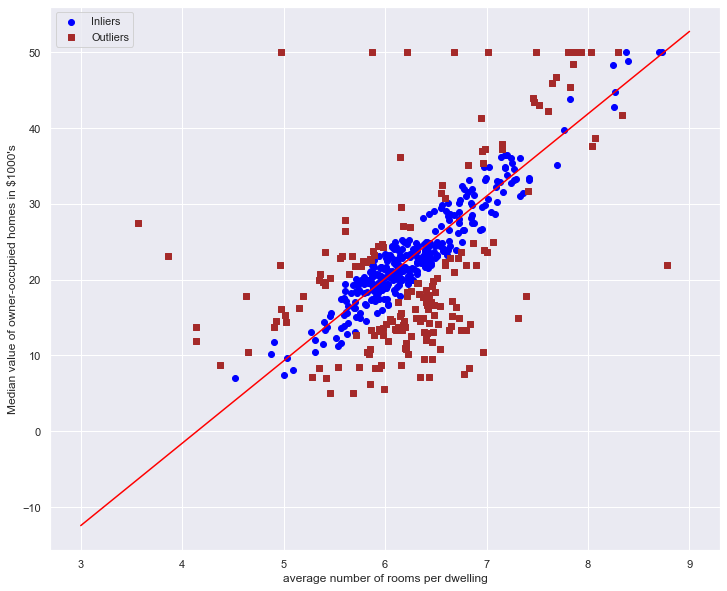

In [17]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')  #best fit line draw korlam
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

In [18]:
ransac.estimator_.coef_

array([10.86991815])

In [19]:
ransac.estimator_.intercept_

-45.060395284267805

In [20]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

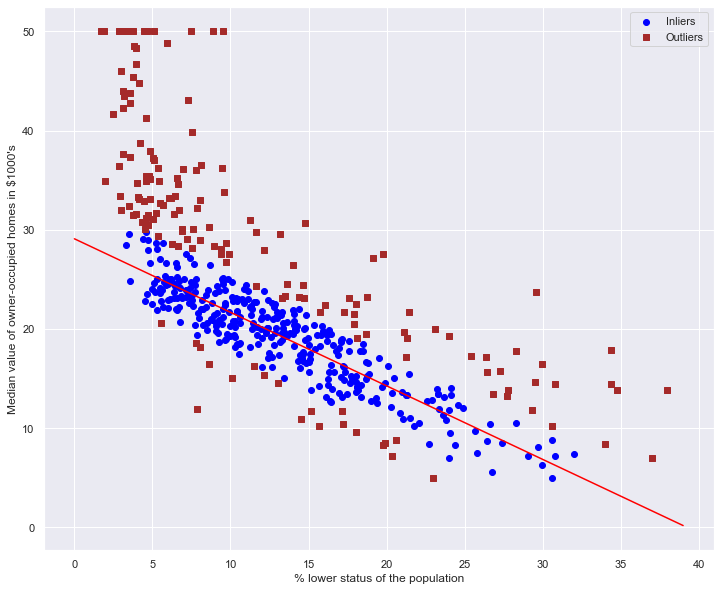

In [21]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

# Performance Evaluation of Regression Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
X = df['LSTAT'].values.reshape(-1,1)
#X = df.iloc[:, :-1].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
y_train_pred = lr.predict(X_train)

In [28]:
y_test_pred = lr.predict(X_test)

# Performance Evaluation Matrix

# Method 1: Residual Analysis

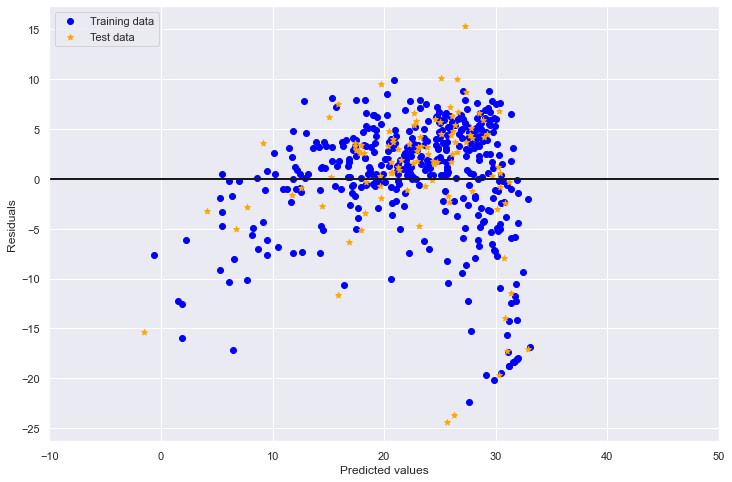

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

# Method 2: Mean Squared Error (MSE)
     MSE=1/n ∑i=1n (yi−y^i)2
 
The average value of the Sums of Squared Error cost function

Useful for comparing different regression models

For tuning parameters via a grid search and cross-validation

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
mean_squared_error(y_train, y_train_pred)

36.523966406959666

In [32]:
mean_squared_error(y_test, y_test_pred)

46.33630536002592

# Method 3: Coefficient of Determination,  R2 
R2=1−SSE/SST
 
SSE: Sum of squared errors

SST: Total sum of squares

In [33]:
from sklearn.metrics import r2_score

In [34]:
r2_score(y_train, y_train_pred)

0.571031588576562

In [35]:
r2_score(y_test, y_test_pred)

0.43095672846187616

# What does a Near Perfect Model Looks Like?

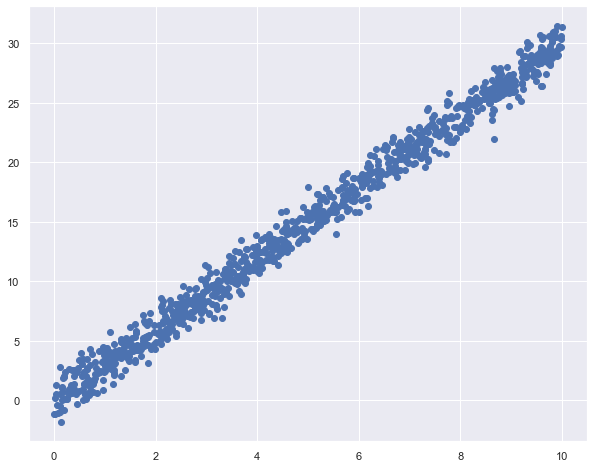

In [36]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

# Method 1 : Residual Analysis

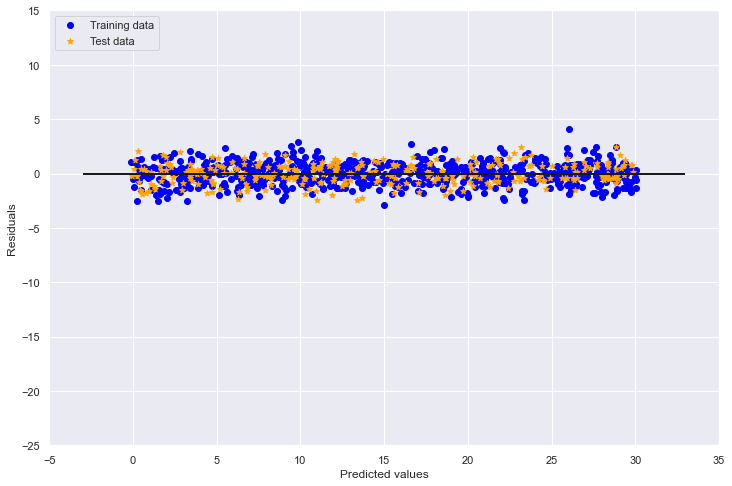

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

# Method 2 : Mean Squared Error (MSE)

In [41]:
mean_squared_error(y_train, y_train_pred)

0.9997488031334482

In [42]:
mean_squared_error(y_test, y_test_pred)

0.8734874518394641

# Method 3 : Coefficient of Determination, R2

In [43]:
r2_score(y_train, y_train_pred)

0.9870781231792138

In [44]:
r2_score(y_test, y_test_pred)

0.9885775739611967